# **Product Recognition of Food Products**

## Image Processing and Computer Vision - Assignment Module \#1


Contacts:

- Prof. Giuseppe Lisanti -> giuseppe.lisanti@unibo.it
- Prof. Samuele Salti -> samuele.salti@unibo.it
- Alex Costanzino -> alex.costanzino@unibo.it
- Francesco Ballerini -> francesco.ballerini4@unibo.it


Computer vision-based object detection techniques can be applied in super market settings to build a system that can identify products on store shelves.
An example of how this system could be used would be to assist visually impaired customers or automate common store management tasks like detecting low-stock or misplaced products, given an image of a shelf in a store.

## Task
Develop a computer vision system that, given a reference image for each product, is able to identify such product from one picture of a store shelf.

<figure>
<a href="https://imgbb.com/">
  <center>
  <img src="https://i.ibb.co/TwkMWnH/Screenshot-2024-04-04-at-14-54-51.png" alt="Screenshot-2024-04-04-at-14-54-51" border="0" width="300" />
</a>
</figure>

For each type of product displayed in the
shelf the system should report:
1. Number of instances;
1. Dimension of each instance (width and height in pixel of the bounding box that enclose them);
1. Position in the image reference system of each instance (center of the bounding box that enclose them).

#### Example of expected output
```
Product 0 - 2 instance found:
  Instance 1 {position: (256, 328), width: 57px, height: 80px}
  Instance 2 {position: (311, 328), width: 57px, height: 80px}
Product 1 – 1 instance found:
.
.
.
```

### Track A - Single Instance Detection
Develop an object detection system to identify single instance of products given one reference image for each item and a scene image.

The system should be able to correctly identify all the product in the shelves
image.

### Track B - Multiple Instances Detection
In addition to what achieved at step A, the system should also be able to detect multiple instances of the same product.

## Data
Two folders of images are provided:
* **Models**: contains one reference image for each product that the system should be able to identify.
* **Scenes**: contains different shelve pictures to test the developed algorithm in different scenarios. The images contained in this folder are corrupted by noise.

#### Track A - Single Instance Detection
* **Models**: {ref1.png to ref14.png}.
* **Scenes**: {scene1.png to scene5.png}.

#### Track B - Multiple Instances Detection
* **Models**: {ref15.png to ref27.png}.
* **Scenes**: {scene6.png to scene12.png}.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/drive/MyDrive/LabSessionsIPCV/AssignmentsIPCV/dataset.zip ./
!unzip dataset.zip

## Evaluation criteria
1. **Procedural correctness**. There are several ways to solve the assignment. Design your own sound approach and justify every decision you make;

2. **Clarity and conciseness**. Present your work in a readable way: format your code and comment every important step;

3. **Correctness of results**. Try to solve as many instances as possible. You should be able to solve all the instances of the assignment, however, a thoroughly justified and sound procedure with a lower number of solved instances will be valued **more** than a poorly designed approach.



---



# Solutions

In [207]:
# Import useful libraries
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [208]:
# change directory
os.chdir("dataset")

only for testing purposes: where each product in each ref image is actually present in the scenes images

single instance detection:
* ref1: scene1/scene4
* ref2: scene1
* ref3: scene2
* ref4: scene2
* ref5: scene2
* ref6: scene3
* ref7: scene3
* ref8: scene3/scene4
* ref9: scene4
* ref10: scene4
* ref11: scene5
* ref12: scene5
* ref13: /
* ref14: /

multiple instances detection:
* ref15: scene6 x2
* ref16: scene7 x2
* ref17 and ref23 are the same image: scene8 x2/scene11 x2
* ref18: scene9 x2/scene12 x2
* ref19: scene9 x2
* ref20: scene9 x2
* ref21: scene10 x2
* ref22: scene10 x2
* ref24: scene8 x1/scene11 x2
* ref25: scene11 x3
* ref26: scene8 x1/scene12 x2
* ref27: scene12 x2






## Track A

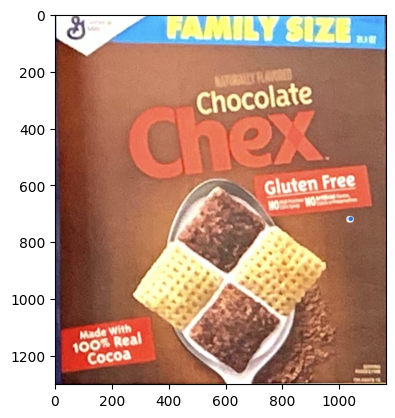

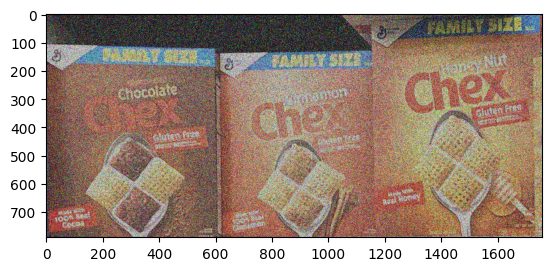

In [345]:
# @title Read and show two samples images, a reference image and a scene image
ref = cv2.imread("models/ref6.png", cv2.IMREAD_COLOR) # or set flag 1
ref_color = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB) # convert to RGB format
scene = cv2.imread("scenes/scene3.png", 1)
scene_color = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)

plt.imshow(ref_color)
plt.show()
plt.imshow(scene_color)
plt.show()

We notice that all of these images are **colored** images, thus they have 3 channels associated with, one for each color.

Since SIFT works more efficeintly with grayscale images, which have only one channel and it can lead to faster computation compared to color images with multiple channels, **we convert** our colored images into **grayscale** images.

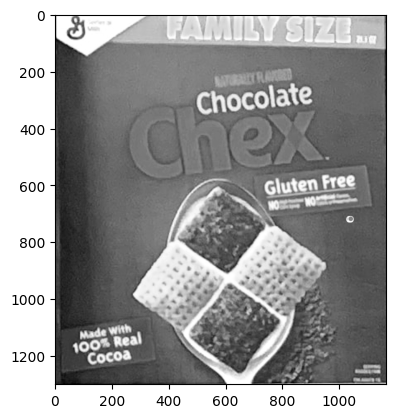

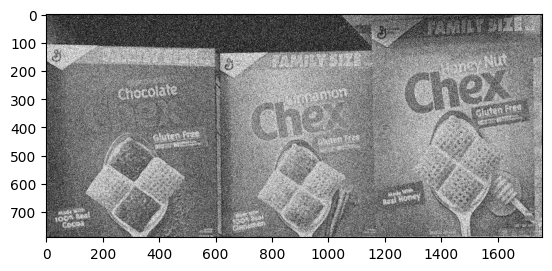

In [346]:
# @title Conversion to grayscale
ref = cv2.cvtColor(ref_color, cv2.COLOR_BGR2GRAY)
gray_scene = cv2.cvtColor(scene_color, cv2.COLOR_BGR2GRAY)

plt.imshow(ref, cmap = "gray")
plt.show()
plt.imshow(gray_scene, cmap = "gray")
plt.show()

## Denoising images
We can clearly see that scene images are corrupted by **noise**.
In order to design our denoising process in a reasonable way, we have to consider two pivotal facts:

1. **Preserving edges**: since our task is an Instance-detection task, preserving edges is crucial.
2. **Gaussian nature of the noise**: we notice that our images are mainly corrupted by Gaussian noise.

Since we can preserve edges by only using **non-linear filters**, we need to include one of them in our denoising process. Even though linear filters (e.g. Gaussian filter) can effectively reduce noise, they blurs the image.

Therefore we will try different combinations of linear and non-linear filters to accomplish this denoising task in the most efficient way.

In [ ]:
#@title Bilateral Filtering
# k size
filter_size = 20

# sigmaColor controls the color space filtering: in particular, controls the degree to which pixels with similar intensity values are considered for smoothing
sigmaColor = 200

# sigmaSpace controls the spatial filtering: it specifies how far from the central pixel the filter will consider neighboring pixels.
sigmaSpace = 75

# Applying the bilateral filter
denoised_scene = cv2.bilateralFilter(gray_scene, filter_size, sigmaColor, sigmaSpace)

# Display the image after filtering.
print("Denoised image")
plt.imshow(denoised_scene, cmap="gray")
plt.show()

Denoised image


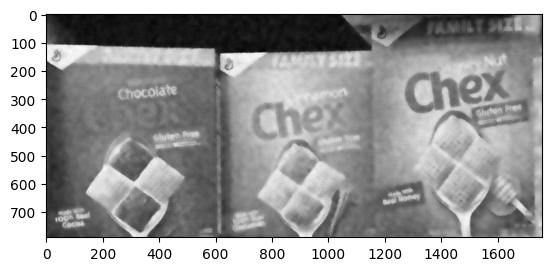

In [347]:
#@title Non-local means filter
denoised_scene = cv2.fastNlMeansDenoising(gray_scene, None, h=50, templateWindowSize=7, searchWindowSize=21)

# Display the image after filtering.
print("Denoised image")
plt.imshow(denoised_scene, cmap="gray")
plt.show()

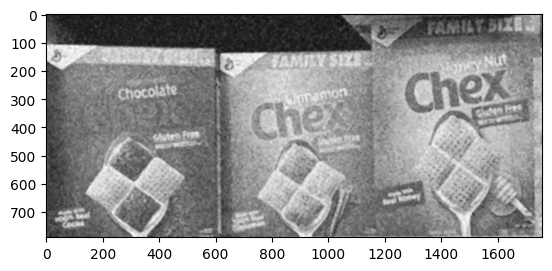

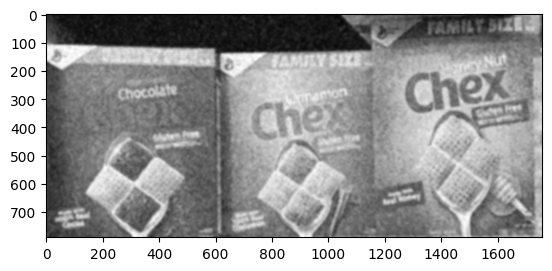

In [321]:
#@title Median + Gaussian smoothing
# We have to apply the median filter before, otherwise I will spread the impulse noise on the whole image
sigma = 3
k_size = int(2*(3*sigma) + 1)

img_tr = cv2.medianBlur(gray_scene, ksize=9)
plt.imshow(img_tr, cmap="gray")
plt.show()

img_trtr = cv2.GaussianBlur(img_tr, (k_size, k_size), sigma)
plt.imshow(img_trtr, cmap="gray")
plt.show()

In [ ]:
#@title Gaussian + Gaussian smoothing
sigma = 3
k_size = int(2*(3*sigma) + 1)

img_tr = cv2.GaussianBlur(gray_scene, (k_size, k_size), sigma)
plt.imshow(img_tr, cmap="gray")
plt.show()

sigma = 5
k_size = int(2*(3*sigma) + 1)

img_trtr = cv2.GaussianBlur(img_tr, (k_size, k_size), sigma)
plt.imshow(img_trtr, cmap="gray")
plt.show()

> as we can see, applying just a linear filter (or a combination of them) results in blurred edges, a situation that we want firmly to avoid.

In [ ]:
#@title Gaussian + Bilateral smoothing
sigma = 5
k_size = int(2*(3*sigma) + 1)

img_tr = cv2.GaussianBlur(gray_scene, (k_size, k_size), sigma)
plt.imshow(img_tr, cmap="gray")
plt.show()

img_trtr = cv2.bilateralFilter(img_tr, d=9, sigmaColor=200, sigmaSpace=200)
plt.imshow(img_trtr, cmap="gray")
plt.show()

In [ ]:
#@title Median + Non-local means filter
img_tr = cv2.medianBlur(gray_scene, ksize=9)
plt.imshow(img_tr, cmap="gray")
plt.show()

denoised_scene_2 = cv2.fastNlMeansDenoising(img_tr, None, h=50, templateWindowSize=7, searchWindowSize=21)
print("Denoised image")
plt.imshow(denoised_scene_2, cmap="gray")
plt.show()

In [323]:
#@title Denoising function
def denoise_image(img):
  sigma = 3
  k_size = int(2*(3*sigma) + 1)
  img_tr = cv2.medianBlur(img, ksize=9)
  img_trtr = cv2.GaussianBlur(img_tr, (k_size, k_size), sigma)
  return img_trtr
  #return cv2.fastNlMeansDenoising(img, None, h=50, templateWindowSize=7, searchWindowSize=21)

#### Let's denoise also the colored scene, in order to compare how SIFT behaves with a grayscale image and a colored one.

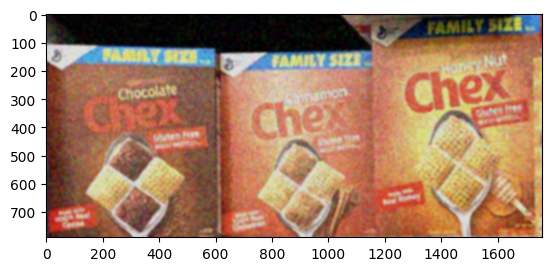

In [348]:
denoised_scene_color = denoise_image(scene_color)
plt.imshow(denoised_scene_color)
plt.show()

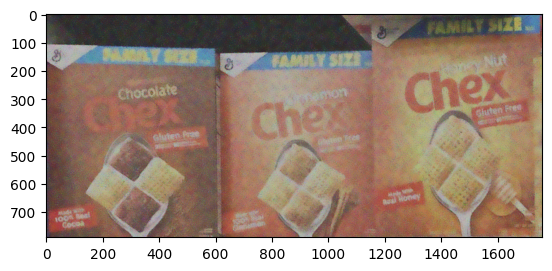

In [349]:
denoised_scene_color = cv2.fastNlMeansDenoising(scene_color, None, h=50, templateWindowSize=7, searchWindowSize=21)
plt.imshow(denoised_scene_color)
plt.show()

## SIFT: keypoints detection

In [350]:
# @title Computing keypoints through SIFT descriptor
# Initialize SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints for both images
kp_ref = sift.detect(ref)
kp_ref_color = sift.detect(ref_color)
kp_scene = sift.detect(denoised_scene)
kp_scene_color = sift.detect(denoised_scene_color)

# Describing keypoints for reference and scene images
kp_ref, descriptor_ref = sift.compute(ref, kp_ref)
kp_ref_color, descriptor_ref_color = sift.compute(ref_color, kp_ref_color)
kp_scene, descriptor_scene = sift.compute(denoised_scene, kp_scene)
kp_scene_color, descriptor_scene_color = sift.compute(denoised_scene_color, kp_scene_color)

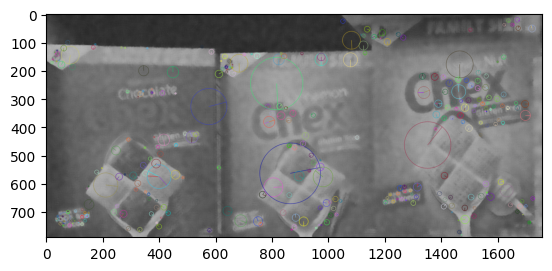

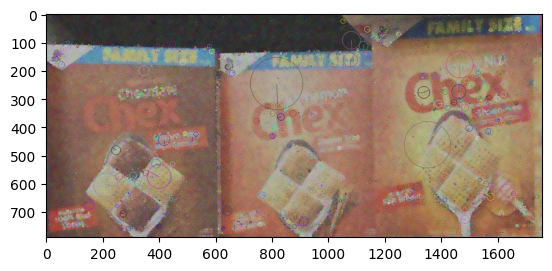

In [351]:
#@title Visualize the keypoints of the scene image
scene_visualization = cv2.drawKeypoints(denoised_scene, kp_scene, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
scene_visualization_color = cv2.drawKeypoints(denoised_scene_color, kp_scene_color, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(scene_visualization)
plt.show()
plt.imshow(scene_visualization_color)
plt.show()

> As a matter of fact, noise smoothing is essential because computing descriptors for a noisy image can lead to the detection of numerous irrelevant keypoints. In fact, the image below illustrates this point clearly:

In [ ]:
# Detect keypoints for the noisy scene
kp_noisy_scene = sift.detect(gray_scene)

# Describing keypoints for reference and scene images
kp_noisy_scene, _ = sift.compute(gray_scene, kp_noisy_scene)

noisy_scene_visualization = cv2.drawKeypoints(gray_scene, kp_noisy_scene, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(noisy_scene_visualization)
plt.show()

>> As we can see, the SIFT detector has found several irrelevant keypoints, due to the annoying presence of noise.

In [352]:
# @title Constants initialization
# Defining index for approximate kdtree algorithm
FLANN_INDEX_KDTREE = 1

# Checking if we found enough matching
MIN_MATCH_COUNT = 100

# Distance ratio threshold
DIST_RATIO = 0.8

# Checks for the search parameters
NUM_CHECKS = 50

In [353]:
# @title Feature matching
def feature_matcher(ref_img, kp_ref, kp_scene, des_ref, des_scene, colored_scene):

  # Defining parameters for algorithm
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

  # Defining search parameters
  search_params = dict(checks = NUM_CHECKS)

  # Initializing matcher
  flann = cv2.FlannBasedMatcher(index_params, search_params)

  # KNN problem: matching and finding the 2 closest elements for each query descriptor
  matches = flann.knnMatch(des_ref, des_scene, k = 2)

  # Filter only good matches
  good = []
  for m, n in matches:
      if m.distance < DIST_RATIO * n.distance:
          good.append(m)

  # Boolean var to check if there is a matching
  match_bool = False

  # Checking if we found enough matchings
  if len(good) > MIN_MATCH_COUNT:

      print(f"number of matches: {len(good)}")

      match_bool = True

      # building the correspondences arrays of good matches
      # reshaping explanation:
        # -1 in the first dimension indicates that the number of rows will be automatically inferred based on the total number of elements.
        # 1 in the second dimension creates a single column (which might seem unnecessary at first glance).
        # 2 in the third dimension ensures there are two elements per row, representing the x and y coordinates of each keypoint.
      src_pts = np.float32([ kp_ref[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
      dst_pts = np.float32([ kp_scene[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

      # Using RANSAC to estimate a robust homography.
      # It returns the homography M and a mask for the discarded points (the outliers)
      M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

      # Mask of discarded point used in visualization
      # Each element indicates whether the corresponding point was considered an inlier (1) or an outlier (0) by RANSAC.
      matchesMask = mask.ravel().tolist()

      # Corners of the query image
      h, w = ref_img.shape
      pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

      # Apply the homography matrix: project the corners into the train image
      dst = cv2.perspectiveTransform(pts, M)

      # Drawing the bounding box
      img_bbox = cv2.polylines(colored_scene, [np.int32(dst)], True, (20, 255, 0), 12, cv2.LINE_AA) # green bounding box

      # Display the center of the retrieved bounding box and its heigth/width
      bbox = dst.copy().reshape(-1, 2)
      heigth_bbox = bbox[1][1] - bbox[0][1] # the bottom-left corner y-coord minus the top-left one
      width_bbox = bbox[2][0] - bbox[1][0] # the bottom-right corner x-coord minus the bottom-left one
      x_center_bbox = (bbox[0][0] + bbox[1][0] + bbox[2][0] + bbox[3][0])/4
      y_center_bbox = (bbox[0][1] + bbox[1][1] + bbox[2][1] + bbox[3][1])/4
      pos_bbox = np.array([x_center_bbox, y_center_bbox])
      print("bounding box | position: ({:.0f}, {:.0f}) - height: {:.0f}px - width: {:.0f}px".format(pos_bbox[0], pos_bbox[1],heigth_bbox, width_bbox))

      return img_bbox, match_bool
  else:
      print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
      matchesMask = None

  return colored_scene, match_bool

number of matches: 131
bounding box | position: (299, 459) - height: 672px - width: 601px


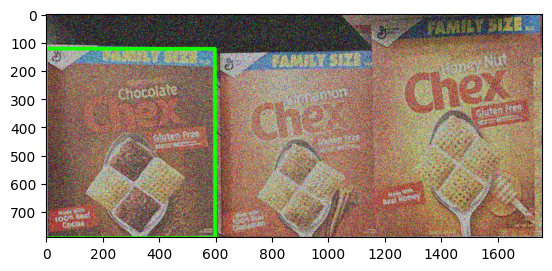

In [354]:
# Show scene image with bounding box
scene_bbox, _ = feature_matcher(ref, kp_ref_color, kp_scene_color, descriptor_ref_color, descriptor_scene_color, scene_color)

plt.imshow(scene_bbox)
plt.show()

number of matches: 103
bounding box | position: (302, 456) - height: 669px - width: 597px


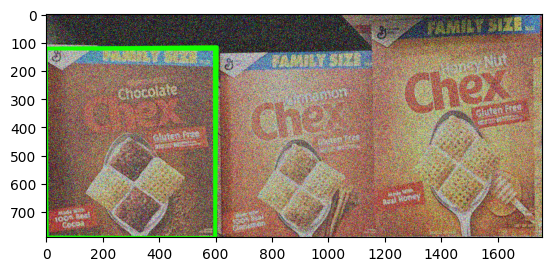

In [355]:
# Show scene image with bounding box
scene_bbox, _ = feature_matcher(ref, kp_ref, kp_scene, descriptor_ref, descriptor_scene, scene_color)

plt.imshow(scene_bbox)
plt.show()

In [312]:
#@title Instance Detection system
from natsort import natsorted

references = natsorted(os.listdir("models"))[:14]
scenes = natsorted(os.listdir("scenes"))[:5]

# loop through the reference images
for ref_filename in references:
  print(f"- {ref_filename}")
  ref = cv2.imread(os.path.join("models", ref_filename), 1)
  ref_color = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)
  ref = cv2.cvtColor(ref_color, cv2.COLOR_BGR2GRAY) # conversion to grayscale

  # SIFT init
  sift = cv2.xfeatures2d.SIFT_create()

  # Detect keypoints for the reference image
  kp_ref = sift.detect(ref)
  kp_ref_color = sift.detect(ref_color)

  scenes_matched_counter = 0 # counter
  scenes_matched_list = [] # list of scenes which contain the reference img

  #plt.imshow(ref_color)
  #plt.show()

  # loop through scenes
  for scene_filename in scenes:
      print(f"\n{scene_filename}")
      scene = cv2.imread(os.path.join("scenes", scene_filename), 1)
      scene_color = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)

      # Conversion to grayscale
      gray_scene = cv2.cvtColor(scene_color, cv2.COLOR_BGR2GRAY)

      # Denoising the scene
      denoised_scene = denoise_image(gray_scene)
      denoised_scene_color = denoise_image(scene_color)

      # detect keypoints for scene
      kp_scene = sift.detect(denoised_scene)
      kp_scene_color = sift.detect(denoised_scene_color)

      # describing keypoints for reference and scene images
      kp_ref, descriptor_ref = sift.compute(ref, kp_ref)
      kp_scene, descriptor_scene = sift.compute(denoised_scene, kp_scene)

      # for colored images
      kp_ref_color, descriptor_ref_color = sift.compute(ref_color, kp_ref_color)
      kp_scene_color, descriptor_scene_color = sift.compute(denoised_scene_color, kp_scene_color)

      # feature matching
      scene_bbox, match_bool = feature_matcher(ref, kp_ref_color, kp_scene_color, descriptor_ref_color, descriptor_scene_color, scene_color)
      if match_bool:
        scenes_matched_counter += 1
        scenes_matched_list.append(scene_filename)

      #plt.imshow(scene_bbox)
      #plt.show()
  print(f"\nScenes matched for the product in '{ref_filename}': {scenes_matched_counter}")
  print(f"Matched scenes: {scenes_matched_list}\n")

- ref1.png

scene1.png
number of matches: 553
bounding box | position: (412, 539) - height: 1048px - width: 802px

scene2.png
Not enough matches are found - 175/200

scene3.png
Not enough matches are found - 89/200

scene4.png
number of matches: 313
bounding box | position: (887, 913) - height: 507px - width: 375px

scene5.png
Not enough matches are found - 137/200

Scenes matched for the product in 'ref1.png': 2
Matched scenes: ['scene1.png', 'scene4.png']

- ref2.png

scene1.png
number of matches: 464
bounding box | position: (1248, 533) - height: 1049px - width: 802px

scene2.png
number of matches: 220
bounding box | position: (1528, 434) - height: 892px - width: 655px

scene3.png
Not enough matches are found - 115/200

scene4.png
Not enough matches are found - 162/200

scene5.png
Not enough matches are found - 149/200

Scenes matched for the product in 'ref2.png': 2
Matched scenes: ['scene1.png', 'scene2.png']

- ref3.png

scene1.png
Not enough matches are found - 117/200

scene2.p

KeyboardInterrupt: 



---



## Track B

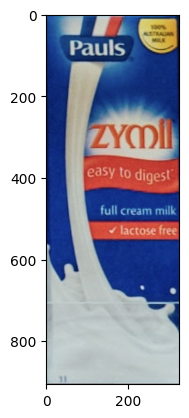

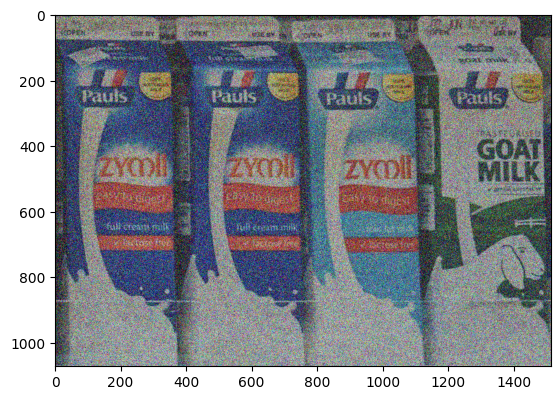

In [ ]:
# @title Read and show two samples images, a reference image and a scene image
ref = cv2.imread("models/ref15.png", cv2.IMREAD_COLOR) # or set flag 1
ref_color = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB) # convert to RGB format
scene = cv2.imread("scenes/scene6.png", 1)
scene_color = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)

plt.imshow(ref_color)
plt.show()
plt.imshow(scene_color)
plt.show()

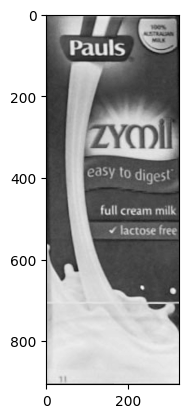

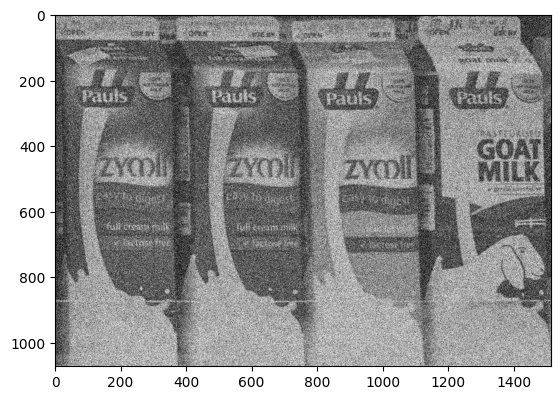

In [ ]:
# @title Conversion to grayscale
ref = cv2.cvtColor(ref_color, cv2.COLOR_BGR2GRAY)
noisy_scene = cv2.cvtColor(scene_color, cv2.COLOR_BGR2GRAY)

plt.imshow(ref, cmap = "gray")
plt.show()
plt.imshow(noisy_scene, cmap = "gray")
plt.show()

Filtered image


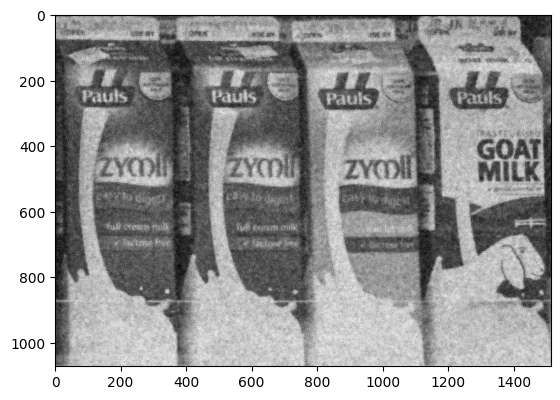

In [ ]:
#@title Bilateral Filtering
# k size
filter_size = 15

# sigmaColor controls the color space filtering: in particular, controls the degree to which pixels with similar intensity values are considered for smoothing
sigmaColor = 75

# sigmaSpace controls the spatial filtering: it specifies how far from the central pixel the filter will consider neighboring pixels.
sigmaSpace = 75

# Applying the bilateral filter
scene = cv2.bilateralFilter(noisy_scene, filter_size, sigmaColor, sigmaSpace)

# Display the image after filtering.
print("Filtered image")
plt.imshow(scene, cmap="gray")
plt.show()

In [ ]:
# @title Computing keypoints through SIFT descriptor
# Initialize SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints for both images
kp_ref = sift.detect(ref)
kp_scene = sift.detect(scene)

# Describing keypoints for reference and scene images
kp_ref, descriptor_ref = sift.compute(ref, kp_ref)
kp_scene, descriptor_scene = sift.compute(scene, kp_scene)

In [ ]:
# @title Feature matching for multiple instances
def feature_matcher_2(ref_img, scene_img, kp_ref, kp_scene, des_ref, des_scene, colored_scene):

  # Defining parameters for algorithm
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

  # Defining search parameters
  search_params = dict(checks = NUM_CHECKS)

  # Initializing matcher
  flann = cv2.FlannBasedMatcher(index_params, search_params)

  # KNN problem: matching and finding the 2 closest elements for each query descriptor
  matches = flann.knnMatch(des_ref, des_scene, k = 2)

  # Filter only good matches
  good = []
  for m, n in matches:
      if m.distance < DIST_RATIO * n.distance:
          good.append(m)

  # Boolean var to check if there is a matching
  match_bool = False

  # Checking if we found enough matchings
  if len(good) > MIN_MATCH_COUNT:

      print(f"number of matches: {len(good)}")

      match_bool = True

      # building the correspondences arrays of good matches
      # reshaping explanation:
        # -1 in the first dimension indicates that the number of rows will be automatically inferred based on the total number of elements.
        # 1 in the second dimension creates a single column (which might seem unnecessary at first glance).
        # 2 in the third dimension ensures there are two elements per row, representing the x and y coordinates of each keypoint.
      src_pts = np.float32([ kp_ref[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
      dst_pts = np.float32([ kp_scene[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

      # Using RANSAC to estimate a robust homography.
      # It returns the homography M and a mask for the discarded points (the outliers)
      M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

      # Mask of discarded point used in visualization
      # Each element indicates whether the corresponding point was considered an inlier (1) or an outlier (0) by RANSAC.
      matchesMask = mask.ravel().tolist()

      # Corners of the query image
      h,w = ref_img.shape
      pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

      # Apply the homography matrix: project the corners into the train image
      dst = cv2.perspectiveTransform(pts, M)

      # Drawing the bounding box
      img_bbox = cv2.polylines(colored_scene, [np.int32(dst)], True, (20, 255, 0), 12, cv2.LINE_AA) # green bounding box

      # Display the center of the retrieved bounding box and its heigth/width
      bbox = dst.copy().reshape(-1, 2)
      heigth_bbox = bbox[1][1] - bbox[0][1] # the bottom-left corner y-coord minus the top-left one
      width_bbox = bbox[2][0] - bbox[1][0] # the bottom-right corner x-coord minus the bottom-left one
      x_center_bbox = (bbox[0][0] + bbox[1][0] + bbox[2][0] + bbox[3][0])/4
      y_center_bbox = (bbox[0][1] + bbox[1][1] + bbox[2][1] + bbox[3][1])/4
      pos_bbox = np.array([x_center_bbox, y_center_bbox])
      print("bounding box | position: ({:.0f}, {:.0f}) - height: {:.0f}px - width: {:.0f}px".format(pos_bbox[0], pos_bbox[1],heigth_bbox, width_bbox))

      return img_bbox, match_bool
  else:
      print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
      matchesMask = None

  return colored_scene, match_bool

number of matches: 51
bounding box | position: (583, 620) - height: 902px - width: 327px


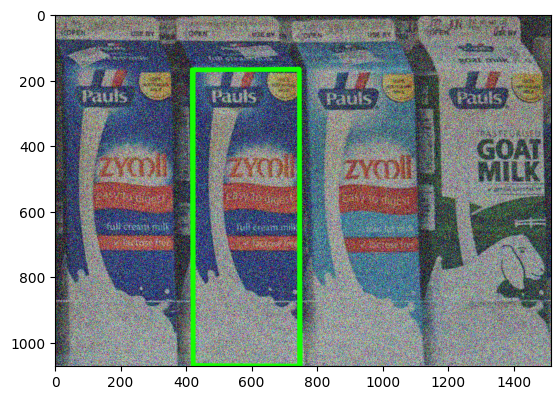

In [ ]:
# Show scene image with bounding box
scene_bbox, _ = feature_matcher_2(ref, scene, kp_ref, kp_scene, descriptor_ref, descriptor_scene, scene_color)

plt.imshow(scene_bbox)
plt.show()